In [1]:
import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE')
from MPRA_exp.MPRA_predict.utils import *

/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_fold_change = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_fold_change_new.csv')
df_pred = pd.read_csv('../../data/SirajMPRA/SirajMPRA_281k_pred.csv')

main_df = pd.concat([df_fold_change, df_pred], axis=1)
main_df = main_df.loc[:, ~main_df.columns.duplicated()]
main_df = main_df.rename(columns={col: col.replace('SK-N-SH', 'SKNSH') for col in main_df.columns})
main_df

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,A549_CTCF_pred_logit,HCT116_DNase_pred_logit,HCT116_H3K4me1_pred_logit,HCT116_H3K4me3_pred_logit,HCT116_H3K9me3_pred_logit,HCT116_H3K27me3_pred_logit,HCT116_H3K27ac_pred_logit,HCT116_H3K36me3_pred_logit,HCT116_CTCF_pred_logit,flag
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-5.178783,-4.183375,-5.234190,-4.748006,-5.354374,-5.090679,-5.958753,-7.642133,-5.942789,True
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-7.003038,-4.215008,-5.436987,-6.929256,-5.848139,-5.366335,-7.071730,-9.561171,-7.614042,True
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-9.144752,-7.840627,-8.620074,-9.203153,-5.563872,-5.998085,-9.125849,-11.204397,-9.197061,True
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,-9.422236,-7.347300,-8.694691,-9.359782,-5.428939,-6.522037,-9.115440,-11.068689,-9.575661,True
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,-8.141296,-6.796749,-8.496226,-8.733803,-5.545477,-6.327884,-9.130206,-9.962906,-8.654516,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281322,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,-6.511399,-6.431361,-7.430185,-8.173793,-5.671370,-6.129188,-8.043088,-9.617792,-7.009111,True
281323,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,0.056848,-0.772791,-4.967724,-5.641770,-6.566808,-6.260857,-6.482600,-8.868452,-0.263586,True
281324,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,-5.489334,-4.034711,-4.979386,-6.015636,-6.284647,-6.169166,-6.730436,-8.404432,-6.365997,True
281325,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-6.070607,-2.356441,-4.035868,-5.232915,-6.058248,-5.297648,-5.920075,-8.679003,-6.512767,True


In [3]:
main_df.columns

Index(['seq', 'A549', 'HepG2', 'K562', 'SKNSH', 'HCT116', 'is_ref', 'chr',
       'pos', 'ref', 'alt', 'hg38_pos', 'HepG2_DNase_fold_change',
       'HepG2_H3K4me1_fold_change', 'HepG2_H3K4me3_fold_change',
       'HepG2_H3K9me3_fold_change', 'HepG2_H3K27me3_fold_change',
       'HepG2_H3K27ac_fold_change', 'HepG2_H3K36me3_fold_change',
       'HepG2_CTCF_fold_change', 'K562_DNase_fold_change',
       'K562_H3K4me1_fold_change', 'K562_H3K4me3_fold_change',
       'K562_H3K9me3_fold_change', 'K562_H3K27me3_fold_change',
       'K562_H3K27ac_fold_change', 'K562_H3K36me3_fold_change',
       'K562_CTCF_fold_change', 'SKNSH_DNase_fold_change',
       'SKNSH_H3K4me1_fold_change', 'SKNSH_H3K4me3_fold_change',
       'SKNSH_H3K9me3_fold_change', 'SKNSH_H3K27me3_fold_change',
       'SKNSH_H3K27ac_fold_change', 'SKNSH_H3K36me3_fold_change',
       'SKNSH_CTCF_fold_change', 'A549_DNase_fold_change',
       'A549_H3K4me1_fold_change', 'A549_H3K4me3_fold_change',
       'A549_H3K9me3_fold_change'

In [4]:
cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

columns = []
for cell_type in cell_types:
    for assay in assays:
        main_df[f'{cell_type}_{assay}_signal_log'] = np.log10(main_df[f'{cell_type}_{assay}_fold_change']+1e-10)

main_df

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,SKNSH_H3K27ac_signal_log,SKNSH_CTCF_signal_log,A549_DNase_signal_log,A549_H3K4me3_signal_log,A549_H3K27ac_signal_log,A549_CTCF_signal_log,HCT116_DNase_signal_log,HCT116_H3K4me3_signal_log,HCT116_H3K27ac_signal_log,HCT116_CTCF_signal_log
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-10.000000,-0.516943,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-10.000000,-10.000000,-1.529831,-0.645598,-0.955446,-0.339377,-1.410610,-0.706831,-0.840647,-10.000000
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-0.722552,-0.498975,-10.000000,-0.317565,-0.882265,-0.102927,-10.000000,-1.016000,-10.000000,-0.276057
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,NaN,-0.332957,-0.149145,-1.048676,-0.391757,True,chr1,108230,C,...,-10.000000,-0.627293,-2.576928,-0.898315,-10.000000,-0.337348,-1.836579,-1.398335,-10.000000,-10.000000
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,NaN,0.607715,0.233677,0.511200,-0.054365,True,chr1,108826,G,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281322,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,NaN,0.579187,0.413490,0.651832,0.509180,True,chrX,155232103,A,...,-0.633120,-0.488049,-1.487988,-0.678139,-0.309568,0.135362,-10.000000,-0.404703,-10.000000,-0.954224
281323,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,NaN,-0.351845,0.458449,-0.744355,-1.145486,True,chrX,155232838,A,...,-0.784456,-0.223703,-1.259435,-0.583061,-0.650661,0.108649,-1.761438,-0.329865,-0.039824,-0.120692
281324,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,-0.467091,0.338415,-0.797860,-0.407416,True,chrX,155233098,T,...,-10.000000,0.112904,-1.467258,-0.404893,-0.187828,-0.033794,-10.000000,-0.628784,-0.955324,-0.954224
281325,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-1.637112,-0.817914,-1.300258,-0.597297,-0.443084,-0.635351,-1.208758,-0.676914,-0.497508,-1.023860


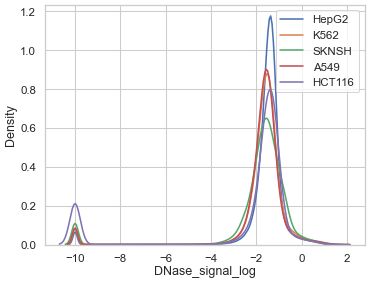

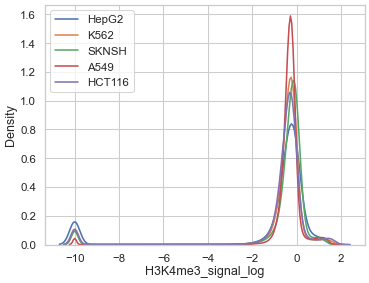

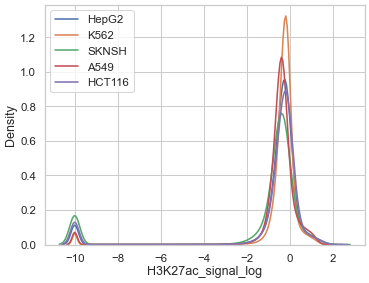

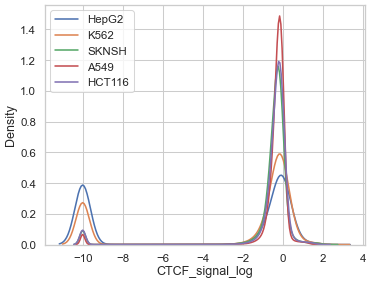

In [23]:
cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
assays = ['DNase']
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = main_df[f'{cell_type}_{assay}_signal_log'].copy()
        # x = x[x<0.5]
        sns.kdeplot(x, label=cell_type)
    # plt.xlim(0, 0.5)
    plt.xlabel(f'{assay}_signal_log')
    plt.legend()
    plt.savefig(f'figures/signal_log_kde/{assay}.png', dpi=200)
    plt.show()


cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
assays = ['H3K4me3', 'H3K27ac', 'CTCF']
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.13, bottom=0.15, right=0.93, top=0.95)
    for cell_type in cell_types:
        x = main_df[f'{cell_type}_{assay}_signal_log'].copy()
        # x = x[x<3]
        sns.kdeplot(x, label=cell_type)
    # plt.xlim(0, 3)
    plt.xlabel(f'{assay}_signal_log')
    plt.legend()
    plt.savefig(f'figures/signal_log_kde/{assay}.png', dpi=200)
    plt.show()

In [23]:
# from pyfaidx import Fasta

# df = pd.read_csv('../../data/SirajMPRA/SirajMPRA_total.csv')
# genome = Fasta('/home/hxcai/genome/hg19.fa')
# flags = np.zeros(len(df), dtype=bool)
# for i, row in tqdm(df.iterrows(), total=len(df)):
#     if row['is_ref']:
#         chr, pos, ref, alt = row['chr'], row['pos'], row['ref'], row['alt']
#         genome_seq = genome[chr][pos-100:pos+100].seq.upper()
#         data_seq = row['seq'].upper()
#         if genome_seq == data_seq:
#             flags[i] = True
# print(flags.sum())


# df_pred = pd.read_csv('data/Sei_Siraj_4features.csv')
# df_pred['is_281k'] = flags
# df_pred.to_csv('data/Sei_Siraj_4features.csv', index=False)

In [27]:
# df_pred = pd.read_csv('data/Sei_Siraj_4features.csv')
# df_pred = df_pred[df_pred['is_281k'] == True].reset_index(drop=True)

# cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
# for cell_type in cell_types:
#     for assay in assays:
#         df_pred[f'{cell_type}_{assay}_true_log'] = np.log10(df_pred[f'{cell_type}_{assay}_fold_change']+1e-10)

# df_pred

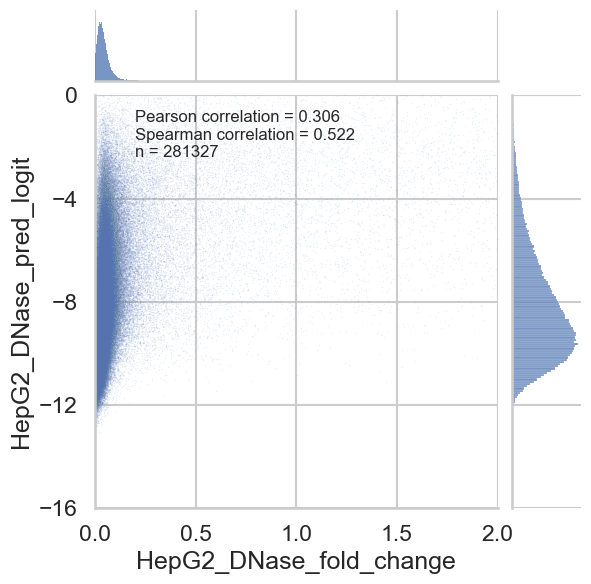

In [9]:
x = main_df['HepG2_DNase_fold_change']
y = main_df['HepG2_DNase_pred_logit']

r1 = pearson(x=x, y=y)
r2 = spearman(x=x, y=y)

g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
plt.xlabel('HepG2_DNase_fold_change')
plt.ylabel('HepG2_DNase_pred_logit')
plt.xlim(0, 2)
plt.ylim(-16, 0)
plt.xticks(np.arange(0, 2.1, 0.5))
plt.yticks(np.arange(-16, 0.1, 4))
plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
         s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )

plt.savefig('figures/HepG2_DNase_fold_change_vs_HepG2_DNase_pred_logit.png', dpi=200)
plt.show()

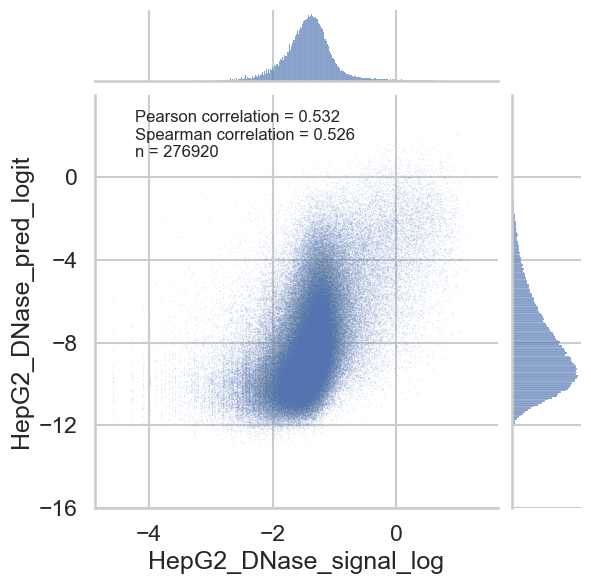

In [19]:
x = main_df['HepG2_DNase_signal_log']
y = main_df['HepG2_DNase_pred_logit']

index = (x > -5)
x = x[index]
y = y[index]

r1 = pearson(x=x, y=y)
r2 = spearman(x=x, y=y)

g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
plt.xlabel('HepG2_DNase_signal_log')
plt.ylabel('HepG2_DNase_pred_logit')
# plt.xlim(0, 2)
# plt.ylim(-16, 0)
# plt.xticks(np.arange(0, 2.1, 0.5))
plt.yticks(np.arange(-16, 0.1, 4))
plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
         s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )

plt.savefig('figures/HepG2_DNase_signal_log_vs_HepG2_DNase_pred_logit.png', dpi=200)
plt.show()

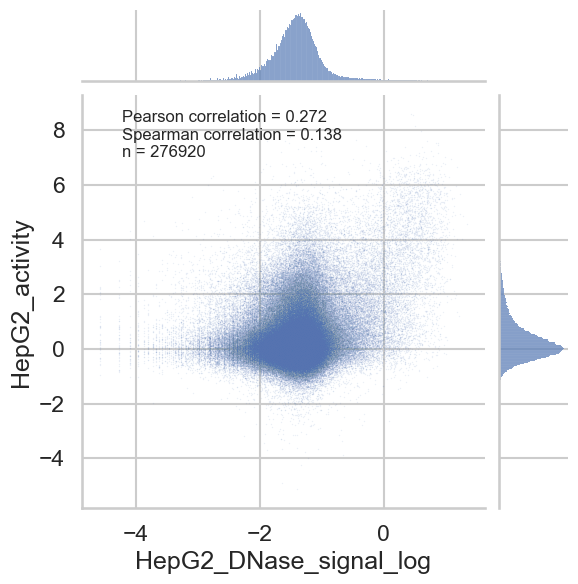

In [14]:
x = main_df['HepG2_DNase_signal_log']
y = main_df['HepG2']

index = (x > -5)
x = x[index]
y = y[index]

r1 = pearson(x=x, y=y)
r2 = spearman(x=x, y=y)

g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
plt.xlabel('HepG2_DNase_signal_log')
plt.ylabel('HepG2_activity')
# plt.xlim(0, 2)
# plt.ylim(-16, 0)
# plt.xticks(np.arange(0, 2.1, 0.5))
# plt.yticks(np.arange(-16, 0.1, 4))
plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
         s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )

plt.savefig('figures/HepG2_DNase_signal_log_vs_HepG2_activity.png', dpi=200)
plt.show()

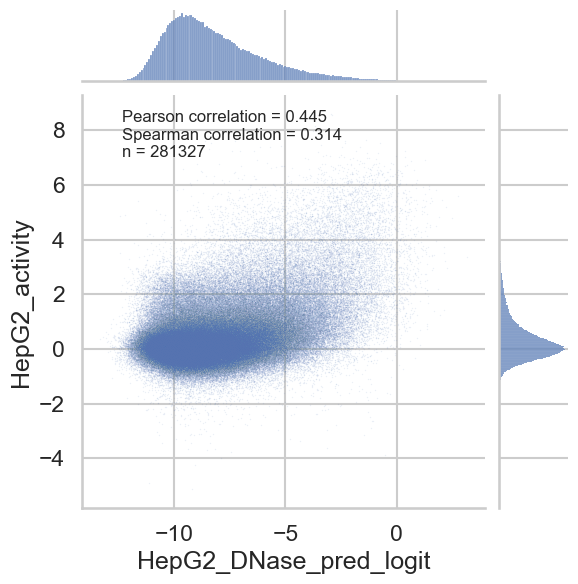

In [16]:
x = main_df['HepG2_DNase_pred_logit']
y = main_df['HepG2']

# index = (x > -5)
# x = x[index]
# y = y[index]

r1 = pearson(x=x, y=y)
r2 = spearman(x=x, y=y)

g = sns.jointplot(x=x, y=y, kind='scatter', s=1, alpha=0.1, height=6)
plt.xlabel('HepG2_DNase_pred_logit')
plt.ylabel('HepG2_activity')
# plt.xlim(0, 2)
# plt.ylim(-16, 0)
# plt.xticks(np.arange(0, 2.1, 0.5))
# plt.yticks(np.arange(-16, 0.1, 4))
plt.text(x=0.1, y=0.85, transform=g.ax_joint.transAxes, fontsize=12,
         s=f'Pearson correlation = {r1:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', )

plt.savefig('figures/HepG2_DNase_pred_logit_vs_HepG2_activity.png', dpi=200)
plt.show()